In [1]:
import numpy as np
np.random.seed(1004)
# Data 
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True,cache=False)

# Reshape data
X = X.reshape(70000,28,28,1)

# Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# Since X are numbers out of 255, in type float 64, conversion is needed. Convert to out of 1
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

# convert labels to OHE
from keras import utils
y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)

Using TensorFlow backend.


Text(0.5, 1.0, '1')

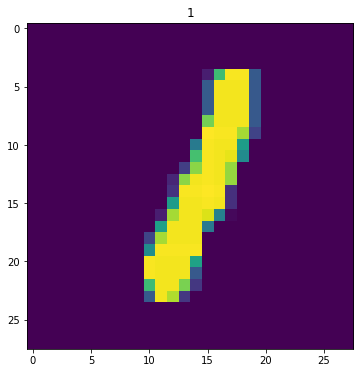

In [2]:
# Let's look at the data
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(6,6))
plt.imshow(X_train[20][:,:,0])
plt.title(y_train[20].argmax())

In [3]:
# Build NN Structure
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import optimizers

batch_size = 128
num_classes = 10
epochs = 12
input_shape = (28,28,1)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation ='relu',
                 input_shape =input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adadelta(),
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

### Let's look at the structure

1. 1st layer Conv2D using 3x3 kernel, 32 filters, Pix size reduced from 28x28 to 26x26. 3X3 kernel drops top, bottom, left, right lines. 5x5 kernel would result a Output shape of 24x24
2. 3rd layer Max_pooling2 using 2x2, 24x24 got reduced to 12x12
3. 5th layer Flatten, graph flattened to 12x12x64 = 9216 list
4. 6th layer Dense, list condensed to 128 with relu
5. 8th Output layer Softmax for multiclass of 10

In [4]:
# train the model
history1 = model.fit(X_train, y_train,
                     batch_size = batch_size,
                     epochs = epochs,
                     verbose = 2,
                     validation_data=(X_test, y_test))

Train on 56000 samples, validate on 14000 samples
Epoch 1/12
 - 85s - loss: 0.2630 - acc: 0.9186 - val_loss: 0.0681 - val_acc: 0.9781
Epoch 2/12
 - 81s - loss: 0.0885 - acc: 0.9740 - val_loss: 0.0503 - val_acc: 0.9841
Epoch 3/12
 - 81s - loss: 0.0660 - acc: 0.9803 - val_loss: 0.0417 - val_acc: 0.9871
Epoch 4/12
 - 82s - loss: 0.0554 - acc: 0.9831 - val_loss: 0.0361 - val_acc: 0.9883
Epoch 5/12
 - 82s - loss: 0.0456 - acc: 0.9860 - val_loss: 0.0327 - val_acc: 0.9898
Epoch 6/12
 - 83s - loss: 0.0421 - acc: 0.9867 - val_loss: 0.0334 - val_acc: 0.9895
Epoch 7/12
 - 84s - loss: 0.0351 - acc: 0.9891 - val_loss: 0.0354 - val_acc: 0.9893
Epoch 8/12
 - 90s - loss: 0.0320 - acc: 0.9902 - val_loss: 0.0303 - val_acc: 0.9906
Epoch 9/12
 - 81s - loss: 0.0304 - acc: 0.9907 - val_loss: 0.0273 - val_acc: 0.9917
Epoch 10/12
 - 87s - loss: 0.0274 - acc: 0.9915 - val_loss: 0.0278 - val_acc: 0.9913
Epoch 11/12
 - 82s - loss: 0.0266 - acc: 0.9914 - val_loss: 0.0282 - val_acc: 0.9911
Epoch 12/12
 - 87s - los

In [5]:
# Looking at each layer
from keras.models import Model
layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(X_train[20].reshape(1,28,28,1))
 
def display_activation(activations, col_size, row_size, act_index): 
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*2.5,col_size*1.5))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='gray')
            activation_index += 1

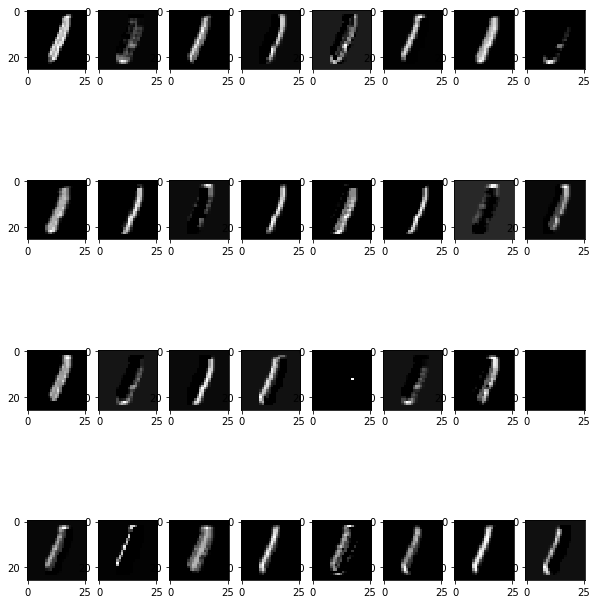

In [7]:
# Layer 1 Conv2D
display_activation(activations, 8, 4, 0)

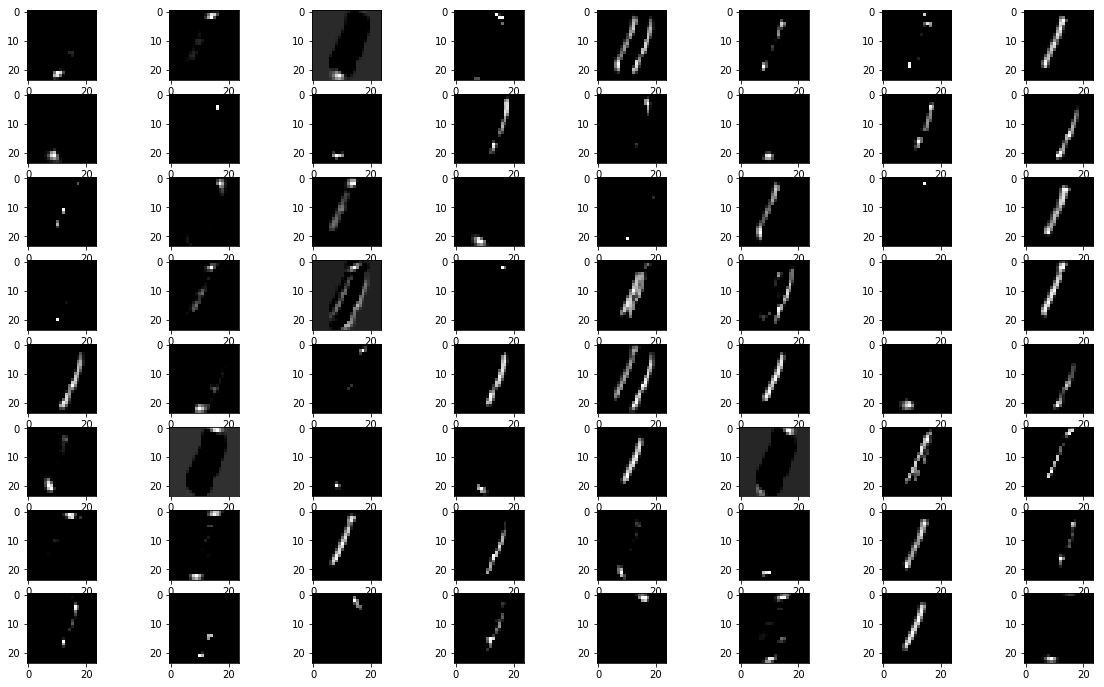

In [8]:
# Layer 2 Conv2D
display_activation(activations, 8, 8 , 1)

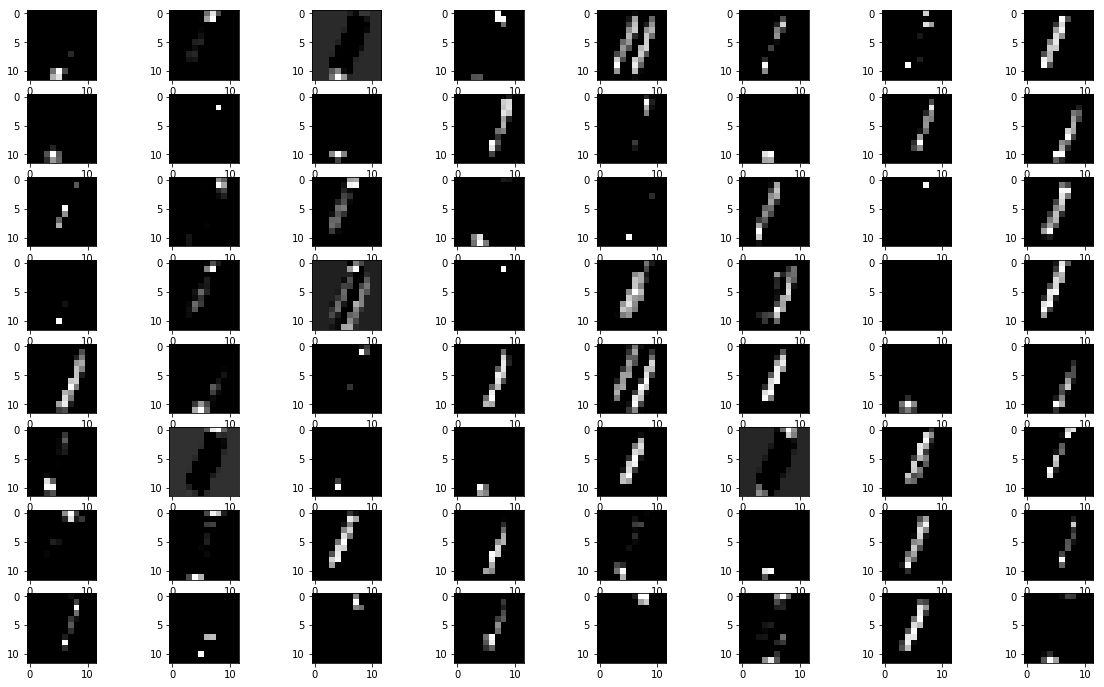

In [9]:
# Layer 3 MaxPooling2D
display_activation(activations, 8, 8, 2)

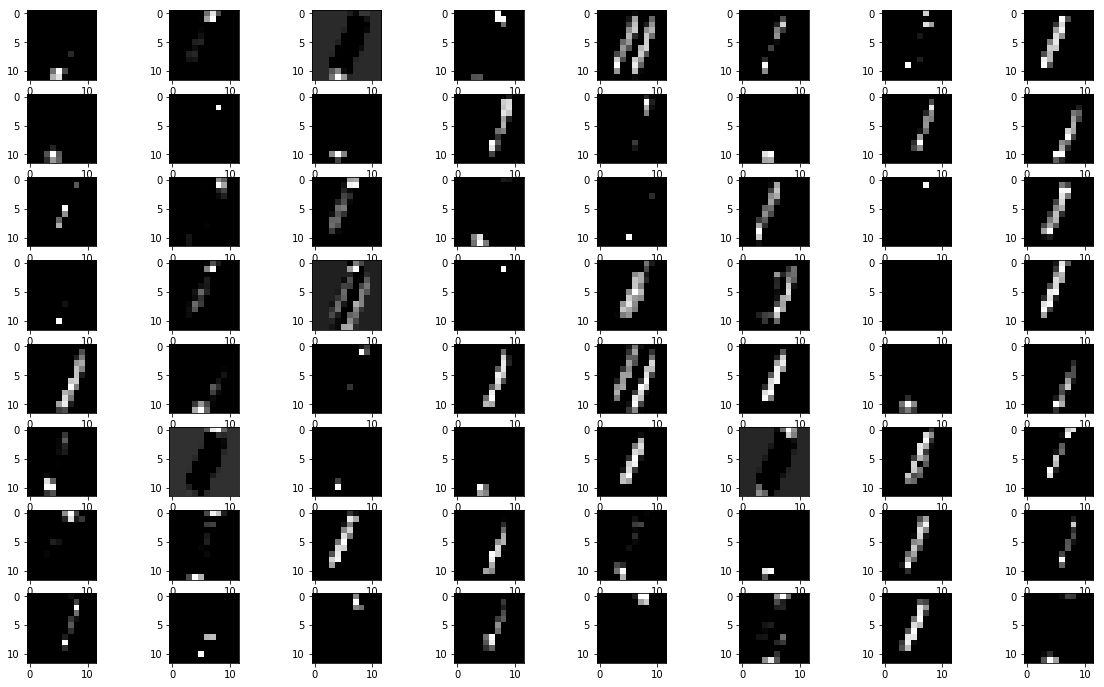

In [10]:
# Layer 4 MaxPooling2D
display_activation(activations, 8, 8, 3)

In [11]:
test_loss,test_acc = model.evaluate(X_test,y_test)
print('test_acc',test_acc)

14000/14000 [==============================] - 5s 371us/step
test_acc 0.9904285714285714


In [12]:
# 1. Output
# Model output of 10 class probabilities
model.predict(X_train[2].reshape(1,28,28,1))

array([[2.3777012e-16, 1.0271219e-14, 2.3344036e-13, 1.0000000e+00,
        4.5804930e-19, 1.9585887e-11, 5.0487420e-18, 1.8665748e-12,
        3.0814365e-13, 1.6145911e-12]], dtype=float32)

In [13]:
test_1=model.predict(X_test)
test_1=(test_1*100).astype('int')
import pandas as pd
test_df = pd.DataFrame(test_1)
test_df.head(5)

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,0,0,0,0,99
1,0,0,0,0,0,0,0,100,0,0
2,0,0,0,0,0,0,0,100,0,0
3,0,0,0,0,0,0,100,0,0,0
4,0,0,99,0,0,0,0,0,0,0
